# Classification with Logistic Regression

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Import Data

In [13]:
df = pd.read_csv('../data/movieData.csv')
print(f'Data Shape: {df.shape}')
print(f'Data Information: {df.info()}')
df.head()

Data Shape: (13, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LevelOfViolence  13 non-null     int64  
 1   CriticsRating    13 non-null     float64
 2   Watched          13 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 444.0 bytes
Data Information: None


,LevelOfViolence,CriticsRating,Watched
0,1,1.2,-1
1,1,3.5,1
2,1,4.2,1
3,2,3.9,1
4,2,2.8,-1


## Split Data

In [14]:
# Features (independent variables)
X = df[['LevelOfViolence', 'CriticsRating']]

# Target (dependent variable)
y = df['Watched']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# X_tt, X_val, y_tt, y_val = train_test_split( df[['LevelOfViolence', 'CriticsRating']], df['Watched'], test_size=0.2, random_state=123)
# X_train, X_test, y_train, y_test = train_test_split(X_tt, y_tt, test_size=0.2, random_state=123)

## Build Classification Model with Logistic Regression

In [16]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [[-0.583523    1.32983924]]
Model Intercept: [-3.44026404]


## Prediction

In [17]:
# Make predictions
y_pred = model.predict(X_test)

## Evaluate the Model

In [18]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Model Data Visualization

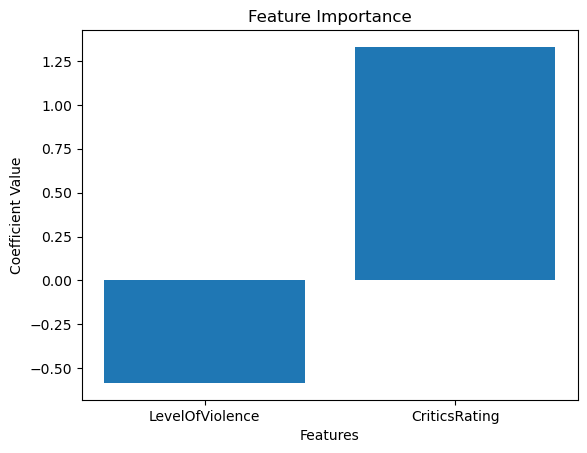

In [ ]:
features = ['LevelOfViolence', 'CriticsRating']
coefficients = model.coef_[0]

plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

/opt/anaconda3/envs/DataScienceStudy/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


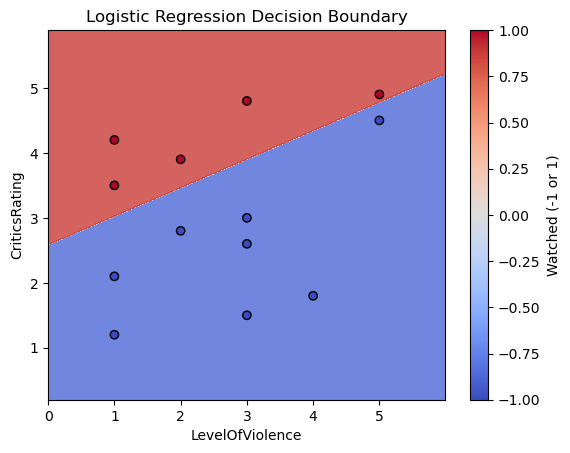

In [20]:
# Create a grid of points to cover the feature space
x_min, x_max = X['LevelOfViolence'].min() - 1, X['LevelOfViolence'].max() + 1
y_min, y_max = X['CriticsRating'].min() - 1, X['CriticsRating'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X['LevelOfViolence'], X['CriticsRating'], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

# Add labels and title
plt.xlabel('LevelOfViolence')
plt.ylabel('CriticsRating')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Watched (-1 or 1)')
plt.show()

## Cross Validation

In [21]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.8333333333333333


### Regularization

In [22]:
model = LogisticRegression(penalty='l2', C=0.1)  # L2 regularization

In [23]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy :", scores.mean())

Cross-Validation Accuracy : 0.6


### Interpretation for Cross Validation:
This suggests that **regularization is improving the model’s generalization performance**.

## Tune the Regularization Strength (C)

In [26]:
# Example dataset
X, y = load_iris(return_X_y=True)

# Define the model
model = LogisticRegression(penalty='l2', solver='liblinear')

# Define the parameter grid for C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best parameters and CV score
print("Best C:", grid_search.best_params_['C'])
print("Best CV Score:", grid_search.best_score_)


Best C: 100
Best CV Score: 0.9800000000000001


In [1]:
import sys
print(sys.executable)


/opt/anaconda3/envs/DataScienceStudy/bin/python
